In [42]:
#GETTING TWEETS FROM FIRST DATASET
tweets = []
for line in open('tweets_data_1.txt'):
        tweets.append(line)
print(tweets[21])

"US #CoronaVirus: To date, a total of 122,246 cases and 2,047 total deaths and #COVID19 deaths have been confirmed in the United States.\n\n#CoronaVirusOutbreak https://t.co/Uk3z6VTMGa"



In [63]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [380]:
df = pd.DataFrame(columns=['tweet'])
for i in range(0,len(tweets)):
    df.loc[i,'tweet'] = tweets[i]

In [381]:
print(df)


                                                   tweet
0      "USA reports 40 new cases and 9 new deaths bri...
1      "#Coronavirus | Tata Sons to contribute Rs 1,0...
2      "\ud83d\udce2 Treatment algorithm for #COVID19...
3      "This is becoming an evergreen tweet.\ud83e\ud...
4      "Beware stimulus check scams https://t.co/kFJr...
...                                                  ...
49424  "Coronavirus killing more than one NYC residen...
49425  "#Boston Children\u2019s Hospital in critical ...
49426  "When is the best time to sell in a #bearmarke...
49427  "10:20am (100 to go!)\n\nThis is not good.. it...
49428  "#Boston Children\u2019s Hospital in critical ...

[49429 rows x 1 columns]


In [382]:
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)
        
    return text

In [383]:
#Remove twitter handlers(@user)
df['cleaned_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus.  \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"



In [384]:
#Remove newlines
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\\n', ' ')
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak   Earlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus.    #COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"



In [385]:
#Remove non-ascii characters
'''df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^\x00-\x7F]+', '')
print(df['tweet'][2])
print(df['cleaned_tweet'][2])'''

"df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^\x00-\x7f]+', '')\nprint(df['tweet'][2])\nprint(df['cleaned_tweet'][2])"

In [386]:
#Remove url links
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("http\S+", "")
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak   Earlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus.    #COVID19 #StayHomeStaySafe 



In [387]:
#remove punctuations, numbers and special characters
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

 #Coronavirus   Tata Sons to contribute Rs       cr towards fighting the #CoronavirusOutbreak   Earlier today  Tata Trusts had pledged Rs     cr to protect  amp  empower communities affected by the virus     #COVID   #StayHomeStaySafe  


In [388]:
#remove multiple whitespaces
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("\s+", " ")
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

 #Coronavirus Tata Sons to contribute Rs cr towards fighting the #CoronavirusOutbreak Earlier today Tata Trusts had pledged Rs cr to protect amp empower communities affected by the virus #COVID #StayHomeStaySafe 


In [389]:
#removing short words
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

#Coronavirus Tata Sons contribute towards fighting #CoronavirusOutbreak Earlier today Tata Trusts pledged protect empower communities affected virus #COVID #StayHomeStaySafe


In [390]:
#making lowercase
df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

#coronavirus tata sons contribute towards fighting #coronavirusoutbreak earlier today tata trusts pledged protect empower communities affected virus #covid #stayhomestaysafe


In [391]:
#tokenizing tweets
tokenized_tweet = df['cleaned_tweet'].apply(lambda x: x.split())

In [392]:
tokenized_tweet.head()

0    [reports, cases, deaths, bringing, total, conf...
1    [#coronavirus, tata, sons, contribute, towards...
2    [udce, treatment, algorithm, #covid, udce, ple...
3    [this, becoming, evergreen, tweet, #coronaviru...
4    [beware, stimulus, check, scams, #secops, #sec...
Name: cleaned_tweet, dtype: object

In [393]:
print(tokenized_tweet[1])


['#coronavirus', 'tata', 'sons', 'contribute', 'towards', 'fighting', '#coronavirusoutbreak', 'earlier', 'today', 'tata', 'trusts', 'pledged', 'protect', 'empower', 'communities', 'affected', 'virus', '#covid', '#stayhomestaysafe']


In [394]:
#stemming tweets
'''from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])'''

'from nltk.stem.porter import *\nstemmer = PorterStemmer()\n\ntokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])'

In [396]:
#lemmatizing tweets
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
lemmatizer = nltk.stem.WordNetLemmatizer()

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def lemmatize_text(text):
    # lemmatize text
    pos_tags = pos_tag(text)
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    return text
# tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
# tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatize_text(x)])
lemmatized_tweet = []
for tweet in tokenized_tweet:
    #print(tweet)
    tweet = lemmatize_text(tweet)
    #print("----")
    #print(tweet)
    lemmatized_tweet.append(tweet)

In [397]:
'''for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])'''
for i in range(len(lemmatized_tweet)):
    lemmatized_tweet[i] = ' '.join(lemmatized_tweet[i]) 
df['cleaned_tweet'] = lemmatized_tweet
print(df.head())

                                               tweet  \
0  "USA reports 40 new cases and 9 new deaths bri...   
1  "#Coronavirus | Tata Sons to contribute Rs 1,0...   
2  "\ud83d\udce2 Treatment algorithm for #COVID19...   
3  "This is becoming an evergreen tweet.\ud83e\ud...   
4  "Beware stimulus check scams https://t.co/kFJr...   

                                       cleaned_tweet  
0  report case death bring total confirmed case t...  
1  #coronavirus tata son contribute towards fight...  
2  udce treatment algorithm #covid udce please sh...  
3  this become evergreen tweet #coronavirus #covi...  
4  beware stimulus check scams #secops #security ...  


In [398]:
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

#coronavirus tata son contribute towards fight #coronavirusoutbreak earlier today tata trust pledge protect empower community affect virus #covid #stayhomestaysafe


In [399]:
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

#coronavirus tata son contribute towards fight #coronavirusoutbreak earlier today tata trust pledge protect empower community affect virus #covid #stayhomestaysafe


In [400]:
print(df['tweet'][1])
print(df['cleaned_tweet'][1])

"#Coronavirus | Tata Sons to contribute Rs 1,000 cr towards fighting the #CoronavirusOutbreak \n\nEarlier today, Tata Trusts had pledged Rs 500 cr to protect &amp; empower communities affected by the virus. @RNTata2000 \n\n#COVID19 #StayHomeStaySafe https://t.co/sopiF0LnvJ"

#coronavirus tata son contribute towards fight #coronavirusoutbreak earlier today tata trust pledge protect empower community affect virus #covid #stayhomestaysafe


In [401]:
df

,tweet,cleaned_tweet
0,"""USA reports 40 new cases and 9 new deaths bri...",report case death bring total confirmed case t...
1,"""#Coronavirus | Tata Sons to contribute Rs 1,0...",#coronavirus tata son contribute towards fight...
2,"""\ud83d\udce2 Treatment algorithm for #COVID19...",udce treatment algorithm #covid udce please sh...
3,"""This is becoming an evergreen tweet.\ud83e\ud...",this become evergreen tweet #coronavirus #covi...
4,"""Beware stimulus check scams https://t.co/kFJr...",beware stimulus check scams #secops #security ...
...,...,...
49424,"""Coronavirus killing more than one NYC residen...",coronavirus kill more than resident hour #coro...
49425,"""#Boston Children\u2019s Hospital in critical ...",#boston child hospital critical need blood don...
49426,"""When is the best time to sell in a #bearmarke...",when best time sell #bearmarket when deal with...
49427,"""10:20am (100 to go!)\n\nThis is not good.. it...",this good trending high prediction #covidfutur...


In [402]:
#Getting emotion lexicon data
emolex_df = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",
                         names=["word","emotion","association"],
                         sep="\t")
print(emolex_df)


         word       emotion  association
0       aback         anger            0
1       aback  anticipation            0
2       aback       disgust            0
3       aback          fear            0
4       aback           joy            0
...       ...           ...          ...
141815   zoom      negative            0
141816   zoom      positive            0
141817   zoom       sadness            0
141818   zoom      surprise            0
141819   zoom         trust            0

[141820 rows x 3 columns]


In [403]:
emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
emotions = emolex_words.columns.drop('word')
emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

print(emo_df.head(100))

emotion  anger  anticipation  disgust  fear  joy  negative  positive  sadness  \
0            0             0        0     0    0         0         0        0   
1            0             0        0     0    0         0         0        0   
2            0             0        0     0    0         0         0        0   
3            0             0        0     0    0         0         0        0   
4            0             0        0     0    0         0         0        0   
..         ...           ...      ...   ...  ...       ...       ...      ...   
95           0             0        0     0    0         0         0        0   
96           0             0        0     0    0         0         0        0   
97           0             0        0     0    0         0         0        0   
98           0             0        0     0    0         0         0        0   
99           0             0        0     0    0         0         0        0   

emotion  surprise  trust  


In [404]:
#len(df['cleaned_tweet'])
for i in range(0, 5):
    print(df['cleaned_tweet'][i])

report case death bring total confirmed case there total death with case death report today #coronavirus #covid #coronavirusoutbreak
#coronavirus tata son contribute towards fight #coronavirusoutbreak earlier today tata trust pledge protect empower community affect virus #covid #stayhomestaysafe
udce treatment algorithm #covid udce please share treatment algorithm from #coronavirus #coronavirusoutbreak #medtwitter udce include recommended med reference
this become evergreen tweet #coronavirus #covid #coronavirusoutbreak #coronaviruspandemic
beware stimulus check scams #secops #security #crypto #privacy #hackers #breach #pii #cybersecurity #zeroday #malware #phishing #patches #exploit #coronavirus #coronavirusoutbreak #covid #covid #medtwitter #coronaviruschallenge #corona #pandemic


In [405]:
print(df['cleaned_tweet'][0])

report case death bring total confirmed case there total death with case death report today #coronavirus #covid #coronavirusoutbreak


In [406]:
document = []
from nltk import word_tokenize
for i in range(0, len(lemmatized_tweet)):
    document = word_tokenize(df['cleaned_tweet'][i])
    for word in document:
        if len(word) > 1:
            #print(word)
            emo_score = emolex_words[emolex_words.word == word]
            if not emo_score.empty:
                for emotion in list(emotions):
                    emo_df.at[i, emotion] += emo_score[emotion]
                    
new_df = pd.concat([df, emo_df], axis=1)
print(new_df)

                                                   tweet  \
0      "USA reports 40 new cases and 9 new deaths bri...   
1      "#Coronavirus | Tata Sons to contribute Rs 1,0...   
2      "\ud83d\udce2 Treatment algorithm for #COVID19...   
3      "This is becoming an evergreen tweet.\ud83e\ud...   
4      "Beware stimulus check scams https://t.co/kFJr...   
...                                                  ...   
49424  "Coronavirus killing more than one NYC residen...   
49425  "#Boston Children\u2019s Hospital in critical ...   
49426  "When is the best time to sell in a #bearmarke...   
49427  "10:20am (100 to go!)\n\nThis is not good.. it...   
49428  "#Boston Children\u2019s Hospital in critical ...   

                                           cleaned_tweet  anger  anticipation  \
0      report case death bring total confirmed case t...      3             3   
1      #coronavirus tata son contribute towards fight...      1             0   
2      udce treatment algorithm #cov

In [407]:
new_df

,tweet,cleaned_tweet,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,"""USA reports 40 new cases and 9 new deaths bri...",report case death bring total confirmed case t...,3,3,3,6,0,6,1,6,3,1
1,"""#Coronavirus | Tata Sons to contribute Rs 1,0...",#coronavirus tata son contribute towards fight...,1,0,0,1,1,2,5,0,0,2
2,"""\ud83d\udce2 Treatment algorithm for #COVID19...",udce treatment algorithm #covid udce please sh...,0,1,0,0,1,0,2,0,0,1
3,"""This is becoming an evergreen tweet.\ud83e\ud...",this become evergreen tweet #coronavirus #covi...,0,0,0,0,1,0,1,0,0,1
4,"""Beware stimulus check scams https://t.co/kFJr...",beware stimulus check scams #secops #security ...,0,1,0,2,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49424,"""Coronavirus killing more than one NYC residen...",coronavirus kill more than resident hour #coro...,0,0,0,1,0,1,1,1,0,0
49425,"""#Boston Children\u2019s Hospital in critical ...",#boston child hospital critical need blood don...,0,1,0,1,1,0,2,1,0,1
49426,"""When is the best time to sell in a #bearmarke...",when best time sell #bearmarket when deal with...,1,4,0,1,2,1,2,0,2,2
49427,"""10:20am (100 to go!)\n\nThis is not good.. it...",this good trending high prediction #covidfutur...,0,3,0,1,1,1,1,1,1,1


In [413]:
count = []
for i in range(0, len(lemmatized_tweet)):
    counter = 0
    document = word_tokenize(df['cleaned_tweet'][i])
    for word in document:
        if len(word) > 1:
            counter = counter + 1
    count.append(counter)
#print(count)
new_df['word_count'] = count

In [416]:
#del new_df['tweet']
new_df

,cleaned_tweet,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,report case death bring total confirmed case t...,3,3,3,6,0,6,1,6,3,1,18
1,#coronavirus tata son contribute towards fight...,1,0,0,1,1,2,5,0,0,2,19
2,udce treatment algorithm #covid udce please sh...,0,1,0,0,1,0,2,0,0,1,18
3,this become evergreen tweet #coronavirus #covi...,0,0,0,0,1,0,1,0,0,1,8
4,beware stimulus check scams #secops #security ...,0,1,0,2,0,3,0,1,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...
49424,coronavirus kill more than resident hour #coro...,0,0,0,1,0,1,1,1,0,0,14
49425,#boston child hospital critical need blood don...,0,1,0,1,1,0,2,1,0,1,13
49426,when best time sell #bearmarket when deal with...,1,4,0,1,2,1,2,0,2,2,22
49427,this good trending high prediction #covidfutur...,0,3,0,1,1,1,1,1,1,1,21


In [417]:
emotion_set = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

In [418]:
for emotion in emotion_set:
    new_df[emotion] = new_df[emotion] / new_df['word_count']

In [419]:
new_df

,cleaned_tweet,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,report case death bring total confirmed case t...,0.166667,0.166667,0.166667,0.333333,0.000000,0.333333,0.055556,0.333333,0.166667,0.055556,18
1,#coronavirus tata son contribute towards fight...,0.052632,0.000000,0.000000,0.052632,0.052632,0.105263,0.263158,0.000000,0.000000,0.105263,19
2,udce treatment algorithm #covid udce please sh...,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.111111,0.000000,0.000000,0.055556,18
3,this become evergreen tweet #coronavirus #covi...,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,8
4,beware stimulus check scams #secops #security ...,0.000000,0.040000,0.000000,0.080000,0.000000,0.120000,0.000000,0.040000,0.000000,0.000000,25
...,...,...,...,...,...,...,...,...,...,...,...,...
49424,coronavirus kill more than resident hour #coro...,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.071429,0.071429,0.000000,0.000000,14
49425,#boston child hospital critical need blood don...,0.000000,0.076923,0.000000,0.076923,0.076923,0.000000,0.153846,0.076923,0.000000,0.076923,13
49426,when best time sell #bearmarket when deal with...,0.045455,0.181818,0.000000,0.045455,0.090909,0.045455,0.090909,0.000000,0.090909,0.090909,22
49427,this good trending high prediction #covidfutur...,0.000000,0.142857,0.000000,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,21


In [479]:
length = len(new_df)
#find average of anger sentiment accross tweets
avg_anger = 0.0
sum_anger = 0.0
for i in range(0, length-1):
    sum_anger = sum_anger + new_df['anger'][i]

avg_anger = sum_anger / length
print("Sum anger: ",sum_anger)
print("Avg anger: ",avg_anger)
print("--------------------------")
#find average of anticipation sentiment accross tweets
avg_anticipation = 0.0
sum_anticipation = 0.0
for i in range(0, length-1):
    sum_anticipation = sum_anticipation + new_df['anticipation'][i]

avg_anticipation = sum_anticipation / length
print("Sum anticipation: ",sum_anticipation)
print("Avg anticipation: ",avg_anticipation)
#find average of disgust sentiment accross tweets
avg_disgust = 0.0
sum_disgust = 0.0
for i in range(0, length-1):
    sum_disgust = sum_disgust + new_df['disgust'][i]

avg_disgust = sum_disgust / length
print("Sum disgust: ",sum_disgust)
print("Avg disgust: ",avg_disgust)
print("--------------------------")
#find average of fear sentiment accross tweets
avg_fear = 0.0
sum_fear = 0.0
for i in range(0, length-1):
    sum_fear = sum_fear + new_df['fear'][i]

avg_fear = sum_fear / length
print("Sum fear: ",sum_anticipation)
print("Avg fear: ",avg_anticipation)
################################################
#find average of joy sentiment accross tweets
avg_joy = 0.0
sum_joy = 0.0
for i in range(0, length-1):
    sum_joy = sum_joy + new_df['joy'][i]

avg_joy = sum_joy / length
print("Sum joy: ",sum_joy)
print("Avg joy: ",avg_joy)
print("--------------------------")
#find average of sadness sentiment accross tweets
avg_sadness = 0.0
sum_sadness = 0.0
for i in range(0, length-1):
    sum_sadness = sum_sadness + new_df['sadness'][i]

avg_sadness = sum_sadness / length
print("Sum sadness: ",sum_sadness)
print("Avg sadness: ",avg_sadness)
#find average of surprise sentiment accross tweets
avg_surprise = 0.0
sum_surprise = 0.0
for i in range(0, length-1):
    sum_surprise = sum_surprise + new_df['surprise'][i]

avg_surprise = sum_surprise / length
print("Sum surprise: ",sum_surprise)
print("Avg surprise: ",avg_surprise)
print("--------------------------")
#find average of fear sentiment accross tweets
avg_trust = 0.0
sum_trust = 0.0
for i in range(0, length-1):
    sum_trust = sum_trust + new_df['trust'][i]

avg_trust = sum_trust / length
print("Sum trust: ",sum_trust)
print("Avg trust: ",avg_trust)

Sum anger:  1777.0561931967818
Avg anger:  0.03595169218873094
--------------------------
Sum anticipation:  1928.1485814852217
Avg anticipation:  0.039008448107087375
Sum disgust:  1171.3856287025355
Avg disgust:  0.023698347704839983
--------------------------
Sum fear:  1928.1485814852217
Avg fear:  0.039008448107087375
Sum joy:  663.7012254347273
Avg joy:  0.013427365017190867
--------------------------
Sum sadness:  2927.767224689682
Avg sadness:  0.059231771322294235
Sum surprise:  1406.0724720341816
Avg surprise:  0.028446306258151723
--------------------------
Sum trust:  1788.2684415874414
Avg trust:  0.036178527617136524


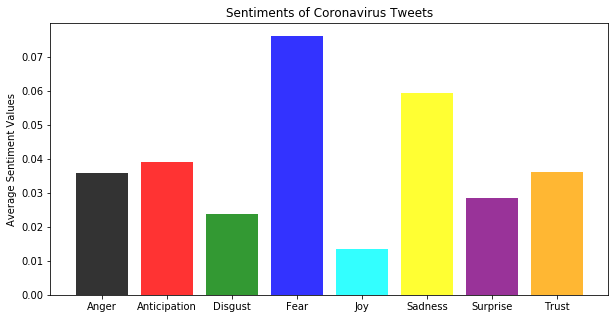

In [443]:
avg_sentiment = [avg_anger, avg_anticipation, avg_disgust, avg_fear, avg_joy, avg_sadness, avg_surprise, avg_trust]
bars = ["Anger", "Anticipation", "Disgust", "Fear", "Joy", "Sadness", "Surprise", "Trust"]
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,5))
plt.bar(y_pos, avg_sentiment, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'orange'], align='center', alpha=0.8)
plt.xticks(y_pos, bars)
plt.ylabel('Average Sentiment Values')
plt.title('Sentiments of Coronavirus Tweets')
plt.show()

In [446]:
#--------------------------------------------------------------------------
#GETTING TWEETS FROM SECOND DATASET
tweets2 = []
for line in open('tweets_data_2.txt'):
        tweets2.append(line)
print(tweets2[0])

"Spain reports 2,579 new cases and 276 new deaths bringing total confirmed cases there to 245,567 and 25,100 total deaths.\n\n#CoronaVirus #Covid19 #CoronaVirusOutbreak"



In [447]:
df2 = pd.DataFrame(columns=['tweet'])
for i in range(0,len(tweets2)):
    df2.loc[i,'tweet'] = tweets2[i]
print(df2)    

      tweet2                                              tweet
0        NaN  "Spain reports 2,579 new cases and 276 new dea...
1        NaN  "#CoronavirusOutbreak | The confirmed cases in...
2        NaN  "Brazil reports 428 new cases and 22 new death...
3        NaN  "California reports 58 new cases and 1 new dea...
4        NaN  "Ecuador reports 1,128 new cases and 308 new d...
...      ...                                                ...
49949    NaN  "Brazil reports 1,048 new cases and 34 new dea...
49950    NaN  "Watch special feature on #COVID19, this morni...
49951    NaN  "COVID-19: 11 individuals test positive in #Ma...
49952    NaN  "Big business resorts in #Maldives keeps on hi...
49953    NaN  "Watch special feature on #COVID19, this morni...

[49954 rows x 2 columns]


In [453]:
#Remove twitter handlers(@user)
df2['cleaned_tweet'] = np.vectorize(remove_pattern)(df2['tweet'], "@[\w]*")
#Remove newlines
df2['cleaned_tweet'] = df2['cleaned_tweet'].str.replace(r'\\n', ' ')
#Remove url links
df2['cleaned_tweet'] = df2['cleaned_tweet'].str.replace("http\S+", "")
#remove punctuations, numbers and special characters
df2['cleaned_tweet'] = df2['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")
#remove multiple whitespaces
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("\s+", " ")
#removing short words
df2['cleaned_tweet'] = df2['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
#making lowercase
df2['cleaned_tweet'] = df2['cleaned_tweet'].str.lower()

print(df2['tweet'][0])
print(df2['cleaned_tweet'][0])



"Spain reports 2,579 new cases and 276 new deaths bringing total confirmed cases there to 245,567 and 25,100 total deaths.\n\n#CoronaVirus #Covid19 #CoronaVirusOutbreak"

spain reports cases deaths bringing total confirmed cases there total deaths #coronavirus #covid #coronavirusoutbreak


In [454]:
#tokenizing tweets
tokenized_tweet2 = df2['cleaned_tweet'].apply(lambda x: x.split())
print(tokenized_tweet2.head())

0    [spain, reports, cases, deaths, bringing, tota...
1    [#coronavirusoutbreak, confirmed, cases, india...
2    [brazil, reports, cases, deaths, bringing, tot...
3    [california, reports, cases, death, bringing, ...
4    [ecuador, reports, cases, deaths, bringing, to...
Name: cleaned_tweet, dtype: object


In [455]:
lemmatized_tweet2 = []
for tweet in tokenized_tweet2:
    #print(tweet)
    tweet = lemmatize_text(tweet)
    #print("----")
    #print(tweet)
    lemmatized_tweet2.append(tweet)

In [456]:
'''for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])'''
for i in range(len(lemmatized_tweet2)):
    lemmatized_tweet2[i] = ' '.join(lemmatized_tweet2[i]) 
df2['cleaned_tweet'] = lemmatized_tweet2
print(df2.head())

                                               tweet  \
0  "Spain reports 2,579 new cases and 276 new dea...   
1  "#CoronavirusOutbreak | The confirmed cases in...   
2  "Brazil reports 428 new cases and 22 new death...   
3  "California reports 58 new cases and 1 new dea...   
4  "Ecuador reports 1,128 new cases and 308 new d...   

                                       cleaned_tweet  
0  spain report case death bring total confirmed ...  
1  #coronavirusoutbreak confirm case india climb ...  
2  brazil report case death bring total confirmed...  
3  california report case death bring total confi...  
4  ecuador report case death bring total confirme...  


In [457]:
print(df2['tweet'][0])
print(df2['cleaned_tweet'][0])

"Spain reports 2,579 new cases and 276 new deaths bringing total confirmed cases there to 245,567 and 25,100 total deaths.\n\n#CoronaVirus #Covid19 #CoronaVirusOutbreak"

spain report case death bring total confirmed case there total death #coronavirus #covid #coronavirusoutbreak


In [468]:
#Getting emotion lexicon data
emolex_df2 = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",
                         names=["word","emotion","association"],
                         sep="\t")
print(emolex_df2)

         word       emotion  association
0       aback         anger            0
1       aback  anticipation            0
2       aback       disgust            0
3       aback          fear            0
4       aback           joy            0
...       ...           ...          ...
141815   zoom      negative            0
141816   zoom      positive            0
141817   zoom       sadness            0
141818   zoom      surprise            0
141819   zoom         trust            0

[141820 rows x 3 columns]


In [472]:
emolex_words2 = emolex_df2.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
emotions2 = emolex_words2.columns.drop('word')
emo_df2 = pd.DataFrame(0, index=df2.index, columns=emotions2)

print(emo_df2.head(100))
#print(len(emo_df2))

emotion  anger  anticipation  disgust  fear  joy  negative  positive  sadness  \
0            0             0        0     0    0         0         0        0   
1            0             0        0     0    0         0         0        0   
2            0             0        0     0    0         0         0        0   
3            0             0        0     0    0         0         0        0   
4            0             0        0     0    0         0         0        0   
..         ...           ...      ...   ...  ...       ...       ...      ...   
95           0             0        0     0    0         0         0        0   
96           0             0        0     0    0         0         0        0   
97           0             0        0     0    0         0         0        0   
98           0             0        0     0    0         0         0        0   
99           0             0        0     0    0         0         0        0   

emotion  surprise  trust  


In [473]:
document2 = []
for i in range(0, len(df2)-1):
    document2 = word_tokenize(df2['cleaned_tweet'][i])
    for word in document2:
        if len(word) > 1:
            #print(word)
            emo_score2 = emolex_words2[emolex_words2.word == word]
            if not emo_score2.empty:
                for emotion in list(emotions2):
                    emo_df2.at[i, emotion] += emo_score2[emotion]
                    
new_df2 = pd.concat([df2, emo_df2], axis=1)
print(new_df2)

                                                   tweet  \
0      "Spain reports 2,579 new cases and 276 new dea...   
1      "#CoronavirusOutbreak | The confirmed cases in...   
2      "Brazil reports 428 new cases and 22 new death...   
3      "California reports 58 new cases and 1 new dea...   
4      "Ecuador reports 1,128 new cases and 308 new d...   
...                                                  ...   
49949  "Brazil reports 1,048 new cases and 34 new dea...   
49950  "Watch special feature on #COVID19, this morni...   
49951  "COVID-19: 11 individuals test positive in #Ma...   
49952  "Big business resorts in #Maldives keeps on hi...   
49953  "Watch special feature on #COVID19, this morni...   

                                           cleaned_tweet  anger  anticipation  \
0      spain report case death bring total confirmed ...      2             2   
1      #coronavirusoutbreak confirm case india climb ...      1             1   
2      brazil report case death brin

In [474]:
count = []
for i in range(0, len(lemmatized_tweet2)):
    counter = 0
    document2 = word_tokenize(df2['cleaned_tweet'][i])
    for word in document2:
        if len(word) > 1:
            counter = counter + 1
    count.append(counter)
#print(count)
new_df2['word_count'] = count

In [476]:
new_df2

,tweet,cleaned_tweet,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,"""Spain reports 2,579 new cases and 276 new dea...",spain report case death bring total confirmed ...,2,2,2,4,0,4,1,4,2,1,14
1,"""#CoronavirusOutbreak | The confirmed cases in...",#coronavirusoutbreak confirm case india climb ...,1,1,1,2,0,2,1,2,1,0,19
2,"""Brazil reports 428 new cases and 22 new death...",brazil report case death bring total confirmed...,3,3,3,6,0,6,1,6,3,1,19
3,"""California reports 58 new cases and 1 new dea...",california report case death bring total confi...,3,3,3,6,0,6,1,6,3,1,19
4,"""Ecuador reports 1,128 new cases and 308 new d...",ecuador report case death bring total confirme...,2,2,2,4,0,4,1,4,2,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49949,"""Brazil reports 1,048 new cases and 34 new dea...",brazil report case death bring total confirmed...,2,2,2,4,0,4,1,4,2,1,14
49950,"""Watch special feature on #COVID19, this morni...",watch special feature #covid this morning live...,0,1,0,1,1,0,2,0,0,0,15
49951,"""COVID-19: 11 individuals test positive in #Ma...",covid individual test positive #maldives editi...,0,1,0,0,0,0,0,0,0,0,14
49952,"""Big business resorts in #Maldives keeps on hi...",business resort #maldives keep hire foreigner ...,1,2,1,2,2,2,3,1,1,4,26


In [482]:
for emotion in emotion_set:
    new_df2[emotion] = new_df2[emotion] / new_df2['word_count']

In [483]:
new_df2

,tweet,cleaned_tweet,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,"""Spain reports 2,579 new cases and 276 new dea...",spain report case death bring total confirmed ...,0.142857,0.142857,0.142857,0.285714,0.000000,0.285714,0.071429,0.285714,0.142857,0.071429,14
1,"""#CoronavirusOutbreak | The confirmed cases in...",#coronavirusoutbreak confirm case india climb ...,0.052632,0.052632,0.052632,0.105263,0.000000,0.105263,0.052632,0.105263,0.052632,0.000000,19
2,"""Brazil reports 428 new cases and 22 new death...",brazil report case death bring total confirmed...,0.157895,0.157895,0.157895,0.315789,0.000000,0.315789,0.052632,0.315789,0.157895,0.052632,19
3,"""California reports 58 new cases and 1 new dea...",california report case death bring total confi...,0.157895,0.157895,0.157895,0.315789,0.000000,0.315789,0.052632,0.315789,0.157895,0.052632,19
4,"""Ecuador reports 1,128 new cases and 308 new d...",ecuador report case death bring total confirme...,0.142857,0.142857,0.142857,0.285714,0.000000,0.285714,0.071429,0.285714,0.142857,0.071429,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49949,"""Brazil reports 1,048 new cases and 34 new dea...",brazil report case death bring total confirmed...,0.142857,0.142857,0.142857,0.285714,0.000000,0.285714,0.071429,0.285714,0.142857,0.071429,14
49950,"""Watch special feature on #COVID19, this morni...",watch special feature #covid this morning live...,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.133333,0.000000,0.000000,0.000000,15
49951,"""COVID-19: 11 individuals test positive in #Ma...",covid individual test positive #maldives editi...,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14
49952,"""Big business resorts in #Maldives keeps on hi...",business resort #maldives keep hire foreigner ...,0.038462,0.076923,0.038462,0.076923,0.076923,0.076923,0.115385,0.038462,0.038462,0.153846,26


In [484]:
length2 = len(new_df2)
#find average of anger sentiment accross tweets
avg_anger2 = 0.0
sum_anger2 = 0.0
for i in range(0, length2-1):
    sum_anger2 = sum_anger2 + new_df2['anger'][i]

avg_anger2 = sum_anger2 / length2
print("Sum anger: ",sum_anger2)
print("Avg anger: ",avg_anger2)
print("--------------------------")
#find average of anticipation sentiment accross tweets
avg_anticipation2 = 0.0
sum_anticipation2 = 0.0
for i in range(0, length2-1):
    sum_anticipation2 = sum_anticipation2 + new_df2['anticipation'][i]

avg_anticipation2 = sum_anticipation2 / length2
print("Sum anticipation: ",sum_anticipation2)
print("Avg anticipation: ",avg_anticipation2)
#find average of disgust sentiment accross tweets
avg_disgust2 = 0.0
sum_disgust2 = 0.0
for i in range(0, length2-1):
    sum_disgust2 = sum_disgust2 + new_df2['disgust'][i]

avg_disgust2 = sum_disgust2 / length2
print("Sum disgust: ",sum_disgust2)
print("Avg disgust: ",avg_disgust2)
print("--------------------------")
#find average of fear sentiment accross tweets
avg_fear2 = 0.0
sum_fear2 = 0.0
for i in range(0, length2-1):
    sum_fear2 = sum_fear2 + new_df2['fear'][i]

avg_fear2 = sum_fear2 / length2
print("Sum fear: ",sum_anticipation2)
print("Avg fear: ",avg_anticipation2)
################################################
#find average of joy sentiment accross tweets
avg_joy2 = 0.0
sum_joy2 = 0.0
for i in range(0, length2-1):
    sum_joy2 = sum_joy2 + new_df2['joy'][i]

avg_joy2 = sum_joy2 / length2
print("Sum joy: ",sum_joy2)
print("Avg joy: ",avg_joy2)
print("--------------------------")
#find average of sadness sentiment accross tweets
avg_sadness2 = 0.0
sum_sadness2 = 0.0
for i in range(0, length2-1):
    sum_sadness2 = sum_sadness2 + new_df2['sadness'][i]

avg_sadness2 = sum_sadness2 / length2
print("Sum sadness: ",sum_sadness2)
print("Avg sadness: ",avg_sadness2)
#find average of surprise sentiment accross tweets
avg_surprise2 = 0.0
sum_surprise2 = 0.0
for i in range(0, length2-1):
    sum_surprise2 = sum_surprise2 + new_df2['surprise'][i]

avg_surprise2 = sum_surprise2 / length2
print("Sum surprise: ",sum_surprise2)
print("Avg surprise: ",avg_surprise2)
print("--------------------------")
#find average of fear sentiment accross tweets
avg_trust2 = 0.0
sum_trust2 = 0.0
for i in range(0, length2-1):
    sum_trust2 = sum_trust2 + new_df2['trust'][i]

avg_trust2 = sum_trust2 / length2
print("Sum trust: ",sum_trust2)
print("Avg trust: ",avg_trust2)

Sum anger:  2822.8205730912173
Avg anger:  0.056508399189078296
--------------------------
Sum anticipation:  3339.909474110945
Avg anticipation:  0.06685970040659298
Sum disgust:  2488.1624990636883
Avg disgust:  0.04980907432965705
--------------------------
Sum fear:  3339.909474110945
Avg fear:  0.06685970040659298
Sum joy:  501.41549624700536
Avg joy:  0.010037544465848688
--------------------------
Sum sadness:  5801.318994718607
Avg sadness:  0.11613322245903446
Sum surprise:  2717.438821570795
Avg surprise:  0.05439882334889688
--------------------------
Sum trust:  2008.1820496658602
Avg trust:  0.040200625568840534


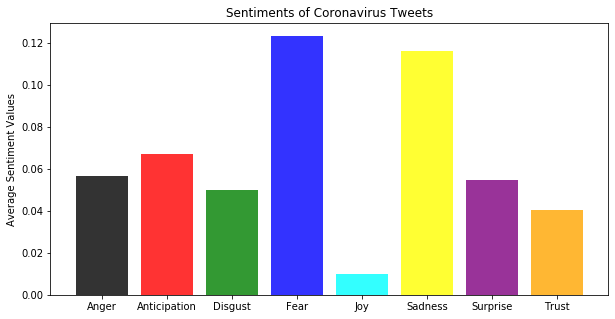

In [485]:
avg_sentiment2 = [avg_anger2, avg_anticipation2, avg_disgust2, avg_fear2, avg_joy2, avg_sadness2, avg_surprise2, avg_trust2]
bars2 = ["Anger", "Anticipation", "Disgust", "Fear", "Joy", "Sadness", "Surprise", "Trust"]
y_pos2 = np.arange(len(bars2))

plt.figure(figsize=(10,5))
plt.bar(y_pos2, avg_sentiment2, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'orange'], align='center', alpha=0.8)
plt.xticks(y_pos2, bars2)
plt.ylabel('Average Sentiment Values')
plt.title('Sentiments of Coronavirus Tweets')
plt.show()

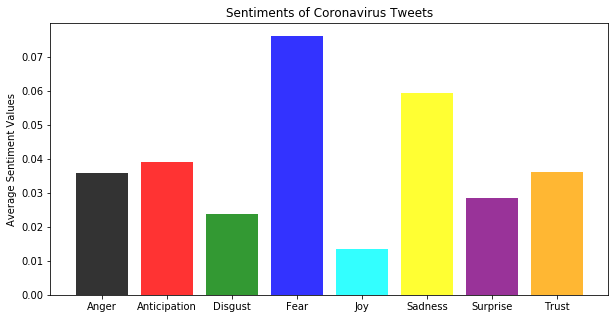

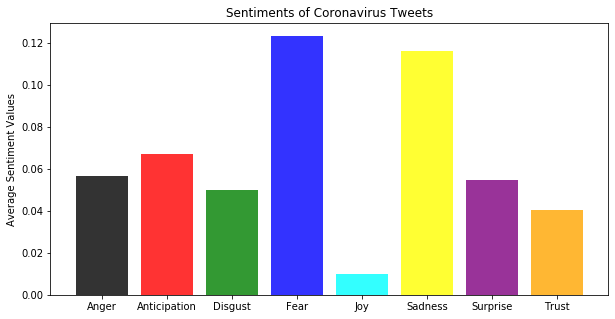

In [487]:
avg_sentiment = [avg_anger, avg_anticipation, avg_disgust, avg_fear, avg_joy, avg_sadness, avg_surprise, avg_trust]
bars = ["Anger", "Anticipation", "Disgust", "Fear", "Joy", "Sadness", "Surprise", "Trust"]
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,5))
plt.bar(y_pos, avg_sentiment, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'orange'], align='center', alpha=0.8)
plt.xticks(y_pos, bars)
plt.ylabel('Average Sentiment Values')
plt.title('Sentiments of Coronavirus Tweets')
plt.show()

avg_sentiment2 = [avg_anger2, avg_anticipation2, avg_disgust2, avg_fear2, avg_joy2, avg_sadness2, avg_surprise2, avg_trust2]
bars2 = ["Anger", "Anticipation", "Disgust", "Fear", "Joy", "Sadness", "Surprise", "Trust"]
y_pos2 = np.arange(len(bars2))

plt.figure(figsize=(10,5))
plt.bar(y_pos2, avg_sentiment2, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'orange'], align='center', alpha=0.8)
plt.xticks(y_pos2, bars2)
plt.ylabel('Average Sentiment Values')
plt.title('Sentiments of Coronavirus Tweets')
plt.show()